# cellDancer decodes the human embryo glutamatergic neurogenesis

In this case tutorial, we analyzed the human embryo glutamatergic neurogenesis dataset previous used by [Gorin et al.](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1010492). There are 1,054 genes and 1,720 cells in the preprocessed dataset.

## Import packages

In [1]:
import os
import sys
import glob
import pandas as pd
import anndata as ann
import math
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.utilities as cdutil
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

## Load cellDancer result

The RNA velocities were predicted using the below parameters.

    cellDancer_df = cd.velocity(cell_type_u_s, permutation_ratio=0.3, max_epoches=150, norm_u_s = False, speed_up=False)

The result can be downloaded from [HgForebrainGlut_cellDancer_estimation.csv.zip](https://drive.google.com/file/d/1Bi5Ss7FtyDNV_gZOeoBPittFDf_EHsPw/view).

In [2]:
# load the prediction result of all genes
cellDancer_df_file = 'your_path/HgForebrainGlut_cellDancer_estimation_spliced.csv'

cellDancer_df=pd.read_csv(cellDancer_df_file)
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,SCAPER,0.377907,0.300250,0.413027,0.319656,0.290919,0.583949,0.605718,0.063386,10X_17_028:AACCATGGTAATCACCx,Neuroblast,-0.162233,2.568855
1,1,SCAPER,0.346111,0.307946,0.385507,0.315725,0.281298,0.585087,0.607075,0.063386,10X_17_028:AACCATGCATACTACGx,Neuroblast,0.388010,2.642608
2,2,SCAPER,0.377427,0.157733,0.431398,0.219263,0.324510,0.573801,0.592829,0.063386,10X_17_028:AAACCTGGTAAAGGAGx,Radial Glia,5.367040,7.357098
3,3,SCAPER,0.450290,0.237188,0.482404,0.296366,0.324551,0.578121,0.598542,0.063386,10X_17_028:AAAGTAGCAAAGTCAAx,Radial Glia,3.537705,9.916307
4,4,SCAPER,0.405460,0.349812,0.429939,0.362193,0.286943,0.586949,0.609536,0.063386,10X_17_028:AAAGCAACAAACGCGAx,Neuroblast,-1.321112,2.327503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812875,1715,PCP4,0.000000,0.017668,0.000006,0.017446,0.000013,0.212723,0.025128,0.061695,10X_17_029:TTTATGCGTTGCGCACx,Radial Glia,3.227375,8.551692
1812876,1716,PCP4,0.000000,0.012055,0.000007,0.011903,0.000013,0.213251,0.025116,0.061695,10X_17_029:TTTGCGCGTTCCGTCTx,Neuroblast,-2.402294,2.295248
1812877,1717,PCP4,0.004955,0.156260,0.004462,0.154773,0.000007,0.200527,0.025388,0.061695,10X_17_029:TTTGGTTGTACCCAATx,Neuron,-7.754744,7.540400
1812878,1718,PCP4,0.000000,0.014440,0.000007,0.014259,0.000013,0.213026,0.025121,0.061695,10X_17_029:TTTCCTCCAGTCCTTCx,Radial Glia,4.793538,10.079043


## Visualize the phase portraits of sample genes

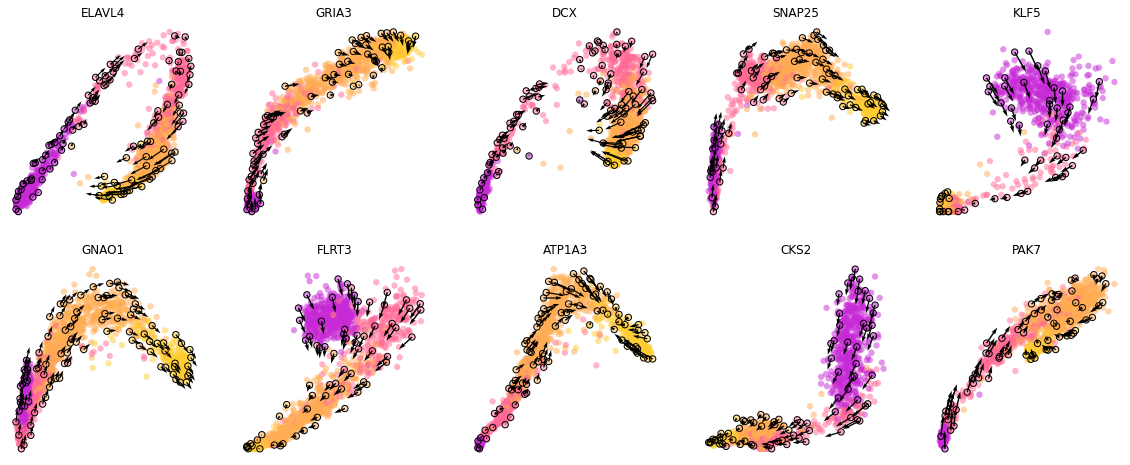

In [3]:
gene_list=['ELAVL4', 'GRIA3', 'DCX', 'SNAP25', 'KLF5', 'GNAO1', 'FLRT3', 'ATP1A3', 'CKS2', 'PAK7']

ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_hgforebrainglut,
        alpha=0.5, 
        s = 40,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')
plt.show()

## Project the RNA velocity onto the embedding space

All genes in cellDancer_df are used to calculate the projection of RNA velocity onto the embedding space.

In [4]:
# compute cell velocity
cellDancer_df=cd.compute_cell_velocity(cellDancer_df=cellDancer_df,
                                       projection_neighbor_choice='embedding', 
                                       expression_scale='power10', 
                                       projection_neighbor_size=100)

Visualize velocity in the embedding space.

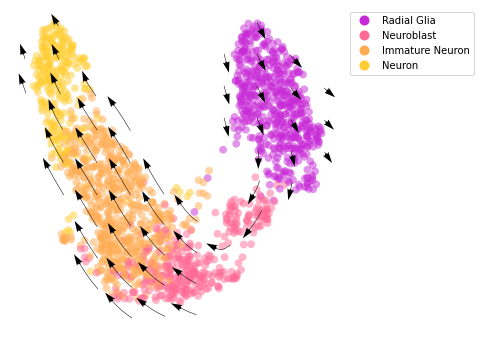

In [5]:
# plot cell velocity
fig, ax = plt.subplots(figsize=(6,6))

cdplt.scatter_cell(ax,
                   cellDancer_df,
                   colors=colormap.colormap_hgforebrainglut,
                   alpha=0.5,
                   s=60,
                   velocity=True,
                   legend='on',
                   min_mass=7,
                   arrow_grid=(10,10),
                   legend_marker_size=10)
ax.axis('off')
plt.show()

## CellDancer is insensitive to the methods of neighbor cells detection

Here we estimated RNA velocities based on neighbor cells defined by both the spliced and unspliced abundances. A new UMAP embedding based on both the unspliced and spliced RNA abundances were generated.

The RNA velocities were predicted with the command below,

    cellDancer_df_u_s = cd.velocity(cell_type_u_s, permutation_ratio=0.3, max_epoches=150, norm_u_s = False, norm_cell_distribution = False, speed_up=False, patience=3)
    
The result can be downloaded from [HgForebrainGlut_cellDancer_estimation_unspliced_spliced.csv.zip](https://drive.google.com/file/d/1Dvo7AUGl8Ai7VtmOH20CgQZAqLyq8A0k/view?usp=sharing). 

In [6]:
# load the prediction result of all genes
cellDancer_df_u_s_file = 'your_path/HgForebrainGlut_cellDancer_estimation_unspliced_spliced.csv'
cellDancer_df_u_s=pd.read_csv(cellDancer_df_u_s_file)
cellDancer_df_u_s

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,SCAPER,0.377907,0.300250,0.405763,0.312984,0.272667,0.574098,0.637763,0.067002,10X_17_028:AACCATGGTAATCACCx,Neuroblast,-0.089552,1.610141
1,1,SCAPER,0.346111,0.307946,0.376842,0.309154,0.260747,0.575780,0.639291,0.067002,10X_17_028:AACCATGCATACTACGx,Neuroblast,0.177206,1.852133
2,2,SCAPER,0.377427,0.157733,0.425090,0.214923,0.307992,0.563463,0.623120,0.067002,10X_17_028:AAACCTGGTAAAGGAGx,Radial Glia,7.815600,5.937497
3,3,SCAPER,0.450290,0.237188,0.478714,0.290154,0.312150,0.566972,0.629754,0.067002,10X_17_028:AAAGTAGCAAAGTCAAx,Radial Glia,6.701630,8.941791
4,4,SCAPER,0.405460,0.349812,0.423425,0.354449,0.269818,0.576849,0.642101,0.067002,10X_17_028:AAAGCAACAAACGCGAx,Neuroblast,-1.126250,1.166313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812875,1715,PCP4,0.000000,0.017668,0.000006,0.017446,0.000013,0.214343,0.025120,0.055841,10X_17_029:TTTATGCGTTGCGCACx,Radial Glia,5.943436,7.754985
1812876,1716,PCP4,0.000000,0.012055,0.000007,0.011903,0.000013,0.214868,0.025108,0.055841,10X_17_029:TTTGCGCGTTCCGTCTx,Neuroblast,-2.248025,0.979071
1812877,1717,PCP4,0.004955,0.156260,0.004458,0.154778,0.000007,0.202196,0.025381,0.055841,10X_17_029:TTTGGTTGTACCCAATx,Neuron,-8.651434,4.843134
1812878,1718,PCP4,0.000000,0.014440,0.000006,0.014259,0.000013,0.214645,0.025113,0.055841,10X_17_029:TTTCCTCCAGTCCTTCx,Radial Glia,7.854761,8.556604


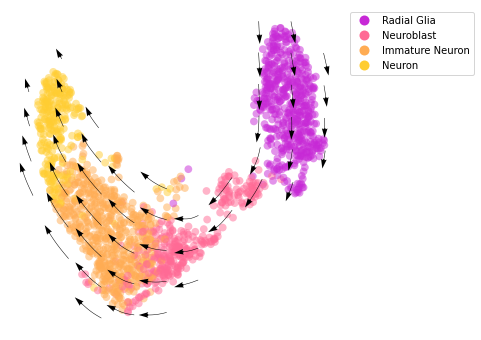

In [7]:
# compute cell velocity
cellDancer_df_u_s=cd.compute_cell_velocity(cellDancer_df=cellDancer_df_u_s,
                                       projection_neighbor_choice='embedding', 
                                       expression_scale='power10', 
                                       projection_neighbor_size=100)

# plot cell velocity
fig, ax = plt.subplots(figsize=(6,6))

cdplt.scatter_cell(ax,
                   cellDancer_df_u_s,
                   colors=colormap.colormap_hgforebrainglut,
                   alpha=0.5,
                   s=60,
                   velocity=True,
                   legend='on',
                   min_mass=5,
                   arrow_grid=(10,10),
                   legend_marker_size=10)
ax.axis('off')
plt.show()

This is consistent with the aforementioned prediction based on neighbor cells defined by the spliced RNA abundances.

## Estimate pseudotime

Pseudotime is determined using the below parameters.

In [8]:
%%capture
# set parameters
dt = 0.05
t_total = {dt:int(10/dt)}
n_repeats = 10

# estimate pseudotime
cellDancer_df = cd.pseudo_time(cellDancer_df=cellDancer_df,
                               grid=(30,30),
                               dt=dt,
                               t_total=t_total[dt],
                               n_repeats=n_repeats,
                               speed_up=(100,100),
                               n_paths = 3,
                               psrng_seeds_diffusion=[i for i in range(n_repeats)],
                               plot_rep_trajs = False,
                               n_jobs=8)

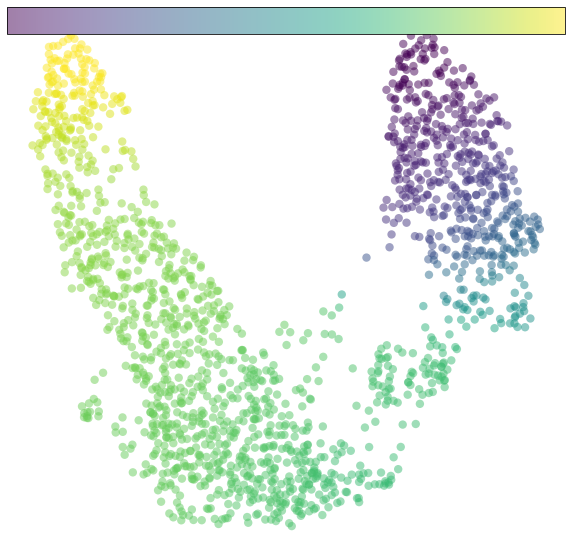

In [9]:
# plot pseudotime
fig, ax = plt.subplots(figsize=(10,10))
im=cdplt.scatter_cell(ax,cellDancer_df, 
                      colors='pseudotime', 
                      alpha=0.5, 
                      s=70,
                      velocity=False, 
                      # colorbar='on'
                     )
ax.axis('off')
plt.show()